# Índice <a name = "indice"></a>
1. [Introdução](#introdução)
2. [Bibliotecas Utilizadas](#bibliotecas)
3. [Formulação do Problema](#problema)
4. [Análise dos Dados](#análise)
    - [Identificação de Dados Irrelevantes](#dados_irrelevantes)
    - [Identificação de Entradas Vazias](#entradas_vazias)
5. [Pré-Processamento dos Dados](#pré-processamento)
    - [Eliminação de Dados Irrelevantes](#eliminação_dados_irrelevantes)
    - [Eliminação de Entradas Vazias](#eliminação_entradas_vazias)
    - [Guardar os Dados Tratados](#dados_tratados)
    
6. [Análise Exploratória](#análise_exploratória)
    - [Transformação de String para Integer](#string_integer)
    - [Análise Geral dos Dados](#análise_geral_dados)
    - [Noção Geral das Avaliações dos Jogos](#avaliações_jogos)
    - [Como Influenciam os Dados o 'Rating'](#influencia_dados)
7. [Classificação](#classificação)
    - [Definir o Target](#target)
    - [Teste 1](#teste_1)
    - [Teste 2](#teste_2)
    - [Teste 3](#teste_3)
    - [Teste 4](#teste_4)
    - [Teste 5](#teste_5)
8. [Comparar Resultados](#comparar_resultados)
9. [Parameter Tuning](#parameter_tuning)
10. [Conclusão](#conclusão)

    -----------------------------------------------------------------------------------------------------------------------

# Introdução <a name = "introdução"></a>
[[voltar ao índice]](#indice)


A ciência de dados tornou-se um domínio indispensável para extrair informações valiosas e tomar decisões informadas a partir de grandes quantidades de dados. Uma das suas áreas pincipais é supervised learning, em que o objectivo é criar modelos que possam prever resultados com base em dados de treino rotulados. Neste Jupyter Notebook, vamos explorar a aplicação de técnicas de supervised learning para prever as pontuações das críticas dos utilizadores a vídeojogos.

A indústria dos jogos tem registado um enorme crescimento ao longo dos anos, com um número crescente de pessoas a participar em jogos de vídeo em várias plataformas. Compreender as preferências dos utilizadores e prever as suas pontuações de avaliação pode fornecer insights importantes para melhorar as experiências dos utilizadores, tomar decisões baseadas em dados e adaptar os seus produtos para satisfazer as exigências do seu público-alvo.

    -----------------------------------------------------------------------------------------------------------------------

# Bibliotecas Utilizadas <a name = "bibliotecas"></a>
[[voltar ao índice]](#indice)

Recomenda-se a utilização da [Anaconda Python distribution](http://continuum.io/downloads) para a visualização deste projeto, dado que este permite o acesso às diversas bibliotecas Python utilizadas.

As principais bibliotecas utilizadas são:
* **NumPy**: Permite realizar uma grande variedade de operações matemáticas em matrizes.
* **Pandas**: Possibilita uma análize e manipulação de dados mais eficientemat. 
* **Scikit-learn:** Dispõe de ferramentas simples e eficientes para análise preditiva de dados.
* **Matplotlib:** Destina-se à criação de gráficos e à visualização de dados em geral
* **Seaborn:** Fornece uma interface de alto nível, tranalhando em simultâneo com o matplotlib.

In [1]:
import time

import pandas as pd

import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sb
from sklearn.preprocessing import LabelEncoder

from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

[[retornar a 'Bibliotecas Utilizadas']](#bibliotecas)

    -----------------------------------------------------------------------------------------------------------------------

# Formulação do Problema <a name = "problema"></a>
[[voltar ao índice]](#indice)

O objetivo deste trabalho é prever se um videojogo tem boas ou más classificações, podendo estas variar entre 'bad', 'mediocre', 'good' ou 'great'. Com o efeito será realizada uma análise exploratória de dados, sendo estes cerca de 6000, e posteriormente aplicados alguns modelos de 'Supervised Learning', tendo-nos sido fornecidos os seguintes dados:


● Identifier: **Id**

● Categorical: **Name**

● Categorical: **Category** (e.g., main game, expansion)

● Numerical: **Number of DLCs**

● Numerical: **Number of expansions**

● Numerical: **Release year**

● Numerical: **Follows** (number of people following a game on the IGDB website)

● Boolean: **In a franchise** (e.g., “Star Wars Racer” → True since it belongs to the Star Wars franchise)

● String: **Genre** (e.g., “Action, Sport”)

● String: **Platform** (e.g., “Xbox, PC”)

● String: **Companies** (e.g., “Electronic Arts, EA Canada)

● Numerical: **Average users score** (0 to 100)

● Categorical: **Average users rating** (bad, mediocre, good or great). Each class represents ~25% of the
data.

● Numerical: **Number of reviews by users**

● String: **Summary**


Por fim, visto que estamos a realizar uma 'classificação', podemos comprovar o quão precisos foram os resultados de modo a avaliar eficácia dos métodos utilizados.

    -----------------------------------------------------------------------------------------------------------------------

# Análise dos Dados <a name = "análise"></a>
[[voltar ao índice]](#indice)

Esta etapa destina-se à examinação dos dados, tendo como objetivo identificar a existência de erros e a relevância dos dados recolhidos, devendo estes ser identificados e posteriormente retificados ou eliminados.

In [2]:
# Ler os dados atribuindo a 'df' o dataset 'video_games.csv'
df = pd.read_csv("video_games.csv", sep = ',')

### Identificação de Dados Irrelevantes <a name = "dados_irrelevantes"></a>
[[voltar a análise de dados]](#análise)

In [3]:
# Imprimir a parte inicial de 'df'
df.head()

,id,name,category,n_dlcs,n_expansions,year,follows,in_franchise,genres,companies,platforms,user_score,user_rating,n_user_reviews,summary
0,1020,Grand Theft Auto V,main_game,0,0,2013,1766,True,"Shooter, Adventure","Rockstar North, Rockstar Games, Take-Two Inter...","PC (Microsoft Windows), PlayStation 3, Xbox 36...",90.202388,great,3369,Grand Theft Auto V is a vast open world game s...
1,1942,The Witcher 3: Wild Hunt,main_game,4,2,2015,1516,True,"Role-playing (RPG), Adventure","WB Games, Bandai Namco Entertainment, cdp.pl, ...","PC (Microsoft Windows), PlayStation 4, Xbox On...",95.169577,great,2997,"RPG and sequel to The Witcher 2 (2011), The Wi..."
2,472,The Elder Scrolls V: Skyrim,main_game,3,0,2011,1046,False,"Role-playing (RPG), Adventure","Bethesda Game Studios, Bethesda Softworks","PC (Microsoft Windows), PlayStation 3, Xbox 360",87.508504,great,2567,Skyrim reimagines and revolutionizes the open-...
3,72,Portal 2,main_game,3,0,2011,963,True,"Shooter, Platform, Puzzle, Adventure","Valve Corporation, Electronic Arts","Linux, PC (Microsoft Windows), PlayStation 3, ...",91.650705,great,2544,"Sequel to the acclaimed Portal (2007), Portal ..."
4,71,Portal,main_game,0,0,2007,894,True,"Shooter, Platform, Puzzle","Valve Corporation, EA","Linux, PC (Microsoft Windows), PlayStation 3, ...",86.931758,great,2297,"Waking up in a seemingly empty laboratory, the..."


Como podemos confirmar os dados não só parecem estar num formato utilizavél, como também apresentam um cabeçalho descritivo (primeira linha), permitindo-nos entender facilmente a que se destina cada coluna. As linhas que se sucedem dizem respeito a uma 'entrada' para cada jogo.

Podemos também verificar que alguns dos dados fornecidos não são estritamente necessários para a realização do trabalho, tal como a coluna identificada por 'summary'.

### Identificação de Entradas Vazias <a name = "entradas_vazias"></a>
[[voltar a análise de dados]](#análise)

In [4]:
df.describe()

,id,n_dlcs,n_expansions,year,follows,user_score,n_user_reviews
count,5824.000000,5824.000000,5824.000000,5824.000000,5824.000000,5824.000000,5824.000000
mean,18508.000515,0.450721,0.120707,2007.293784,35.428056,75.115510,86.186470
std,30546.018723,2.150920,0.811236,9.342881,85.026280,10.197815,194.781917
min,1.000000,0.000000,0.000000,1971.000000,0.000000,10.266748,11.000000
25%,2271.750000,0.000000,0.000000,2001.000000,5.000000,69.937370,16.000000
50%,7258.000000,0.000000,0.000000,2009.000000,11.000000,76.258903,28.000000
75%,18581.250000,0.000000,0.000000,2015.000000,28.000000,81.695739,67.000000
max,178351.000000,44.000000,29.000000,2022.000000,1766.000000,99.738172,3369.000000


A partir desta tabela podemos confirmar que dos dados que nela se apresentam nenhum deles se encontra incompleto, no entanto não podemos admitir que o mesmo sucede para os dados omitidos. É portanto necessário avaliar todos os dados.

In [5]:
#obter o somatório da quantidade de células por coluna que apresentam valores nulos
df.isnull().sum()

id                 0
name               0
category           0
n_dlcs             0
n_expansions       0
year               0
follows            0
in_franchise       0
genres            21
companies         43
platforms          0
user_score         0
user_rating        0
n_user_reviews     0
summary            8
dtype: int64

Como é possivel observar, existem valores nulos em 'genres' e em 'companies', respetivamente 21 e 43. Sem uma avaliação correta dos dados estas gralhas permaneceriam ocultas. 

    -----------------------------------------------------------------------------------------------------------------------

# Pré-Processamento dos Dados <a name = "pré-processamento"></a>
[[voltar ao índice]](#indice)

Uma vez identificados os problemas existentes com os dados passamos para a sua retificação.

### Eliminação de Dados Irrelevantes <a name = "eliminação_dados_irrelevantes"></a>
[[voltar ao pré-processamento de dados]](#pré-processamento)

Tal como foi identificado na [Análise de Dados](#análise) em [Identificação de Dados Irrelevantes](#dados_irrelevantes), nem todas as informações recolhidas são estritamente necessárias, como tal devemos realizar a sua remoção para melhorar a eficácia da pesquisa futuramente.

In [6]:
# Eliminar a coluna 'summary' 
df.drop('summary', axis = 1, inplace = True)

In [7]:
# Observar as alterações efetuadas
df.head()

,id,name,category,n_dlcs,n_expansions,year,follows,in_franchise,genres,companies,platforms,user_score,user_rating,n_user_reviews
0,1020,Grand Theft Auto V,main_game,0,0,2013,1766,True,"Shooter, Adventure","Rockstar North, Rockstar Games, Take-Two Inter...","PC (Microsoft Windows), PlayStation 3, Xbox 36...",90.202388,great,3369
1,1942,The Witcher 3: Wild Hunt,main_game,4,2,2015,1516,True,"Role-playing (RPG), Adventure","WB Games, Bandai Namco Entertainment, cdp.pl, ...","PC (Microsoft Windows), PlayStation 4, Xbox On...",95.169577,great,2997
2,472,The Elder Scrolls V: Skyrim,main_game,3,0,2011,1046,False,"Role-playing (RPG), Adventure","Bethesda Game Studios, Bethesda Softworks","PC (Microsoft Windows), PlayStation 3, Xbox 360",87.508504,great,2567
3,72,Portal 2,main_game,3,0,2011,963,True,"Shooter, Platform, Puzzle, Adventure","Valve Corporation, Electronic Arts","Linux, PC (Microsoft Windows), PlayStation 3, ...",91.650705,great,2544
4,71,Portal,main_game,0,0,2007,894,True,"Shooter, Platform, Puzzle","Valve Corporation, EA","Linux, PC (Microsoft Windows), PlayStation 3, ...",86.931758,great,2297


Como podemos comprovar as colunas selecionadas foram devidamente removidas, uma vez vez que já não se encontram na tabela.

### Eliminação de Entradas Vazias <a name = "eliminação_entradas_vazias"></a>
[[voltar ao pré-processamento de dados]](#pré-processamento)

Na etapa [Identificação de Entradas Vazias](#entradas_vazias) de [Análise de Dados](#análise) concluimos que alguns dados não estão completos, havendo incongruências em 'genres' e em 'companies'. Devemos portanto eliminar estas células e verificar se estes problemas desapareceram.

In [8]:
#remover as celulas vazias
df = df.dropna()

In [9]:
df.isnull().sum()

id                0
name              0
category          0
n_dlcs            0
n_expansions      0
year              0
follows           0
in_franchise      0
genres            0
companies         0
platforms         0
user_score        0
user_rating       0
n_user_reviews    0
dtype: int64

Concluimos, portanto, que a remoção das células nulas foi efetuada com sucesso.

### Guardar os Dados Tratados <a name = "dados_tratados"></a>
[[voltar ao pré-processamento de dados]](#pré-processamento)

Para facilitar o acesso aos dados pré-processados, podemos guardar um arquivo que contenha os dados modificados e trabalhar diretamente com esse ficheiro a partir de agora.

In [10]:
df.to_csv('video_games_clean.csv', index=False)

df_clean = pd.read_csv('video_games_clean.csv')

    -----------------------------------------------------------------------------------------------------------------------

# Análise Exploratória <a name = "análise_exploratória"></a>
[[voltar ao índice]](#indice)

Em seguida, é importante entender como os dados estão distribuidos, se estão relacionados entre si, se existem fatores de confusão que possam explicar as suas correlações, entre outros, o que pode ser avaliado a partir de gráficos e tabelas.

### Transformação de String para Integer <a name = "string_integer"></a>
[[voltar à análise exploratória]](#análise_exploratória)

Alguns dos dados, considerados importantes, encontram-se formatados em string. No entanto, não é possível analisá-los ou utilizá-los enquanto não forem inteiros, deste modo é necessário transformá-los. Uma vez transformados é possivel utilizá-los para criar gráficos e realizar operações.

In [11]:
# Quantidade de cada 'Rating'
n_great = df_clean['user_rating'].value_counts()[0]
n_good = df_clean['user_rating'].value_counts()[1]
n_medium = df_clean['user_rating'].value_counts()[2]
n_bad = df_clean['user_rating'].value_counts()[3]

In [12]:
# Transformações das 'features' para 'labels'
Le = LabelEncoder()
label1 = df_clean['id']
label2 = Le.fit_transform(df_clean['name'])
label3 = Le.fit_transform(df_clean['category'])
label4 = df_clean['n_dlcs']
label5 = df_clean['n_expansions']
label6 = df_clean['year']
label7 = df_clean['follows']
label8 = Le.fit_transform(df_clean['in_franchise'])
label9 = Le.fit_transform(df_clean['genres'])
label10 = Le.fit_transform(df_clean['companies'])
label11 = Le.fit_transform(df_clean['platforms'])
target = df_clean['user_rating']

###  Análise Geral dos Dados <a name = "análise_geral_dados"></a>
[[voltar à análise exploratória]](#análise_exploratória)

In [13]:
df_clean.describe()

,id,n_dlcs,n_expansions,year,follows,user_score,n_user_reviews
count,5761.000000,5761.000000,5761.000000,5761.000000,5761.000000,5761.000000,5761.000000
mean,18309.313140,0.455650,0.122027,2007.282590,35.704218,75.110109,86.923277
std,30449.726128,2.162131,0.815562,9.355368,85.435266,10.131604,195.712750
min,1.000000,0.000000,0.000000,1971.000000,0.000000,10.266748,11.000000
25%,2255.000000,0.000000,0.000000,2001.000000,5.000000,69.939646,16.000000
50%,7208.000000,0.000000,0.000000,2009.000000,11.000000,76.198566,29.000000
75%,18263.000000,0.000000,0.000000,2015.000000,28.000000,81.661878,68.000000
max,178351.000000,44.000000,29.000000,2022.000000,1766.000000,99.738172,3369.000000


### Noção Geral das Avaliações dos Jogos <a name = "avaliações_jogos"></a>
[[voltar à análise exploratória]](#análise_exploratória)

In [14]:
# Calcular os valores necessários
soma_total = n_great + n_good + n_medium + n_bad

great_percentage = round((n_great/soma_total)*100, 2)
good_percentage = round((n_good/soma_total)*100, 2)
medium_percentage = round((n_medium/soma_total)*100, 2)
bad_percentage = round((n_bad/soma_total)*100, 2)

In [15]:
# Criar uma tabela
tabela_ratings = pd.DataFrame({
    'Rating': ["great", "good", "medium", "bad"],
    'Soma': [n_great, n_good, n_medium, n_bad],
    'Percentagem': [f"{great_percentage}%", f"{good_percentage}%", f"{medium_percentage}%", f"{bad_percentage}%"]
})

display(tabela_ratings)

,Rating,Soma,Percentagem
0,great,3153,54.73%
1,good,2500,43.4%
2,medium,97,1.68%
3,bad,11,0.19%


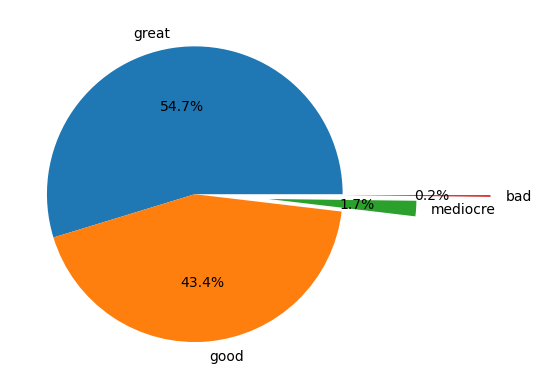

In [16]:
# Criar gráfico circular
x1=df_clean.user_rating.value_counts().values
plt.pie(x=x1, labels=['great', 'good', 'mediocre', 'bad'], autopct='%1.1f%%', explode = (0, 0, 0.5,1 ))
plt.show()

A partir da tabela e do gráfico, é possivel concluir que a percentagem de jogos avaliados como 'great' e 'good' é muito superior aos jogos avaliados como 'mediocre' e 'bad', sendo que estes últimos constituem apenas cerca de 2% das avaliações totais.

### Como Influenciam os Dados o Rating <a name = "influencia_dados"></a>
[[voltar à análise exploratória]](#análise_exploratória)

**Matriz Confusão**

<function matplotlib.pyplot.show(close=None, block=None)>

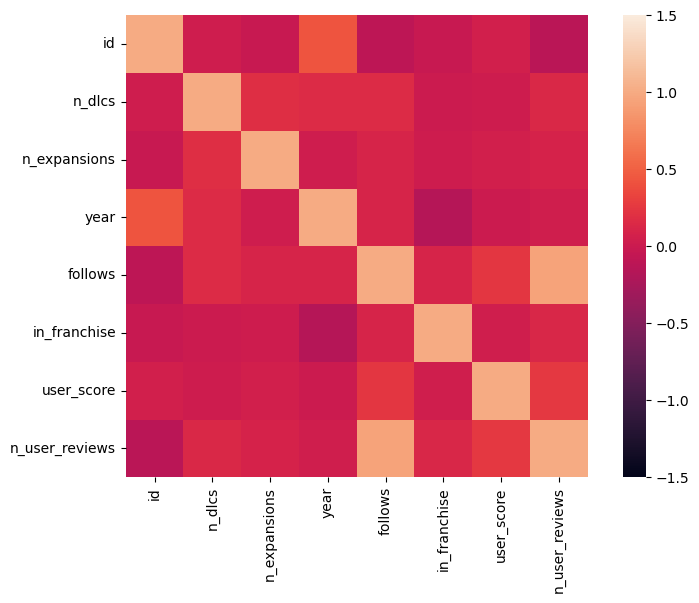

In [17]:
fig=plt.figure(figsize=(9,6))
sb.heatmap(df_clean.corr(numeric_only=True), vmax=1.5, vmin=-1.5, square=True)
plt.show

**Pair Plot**

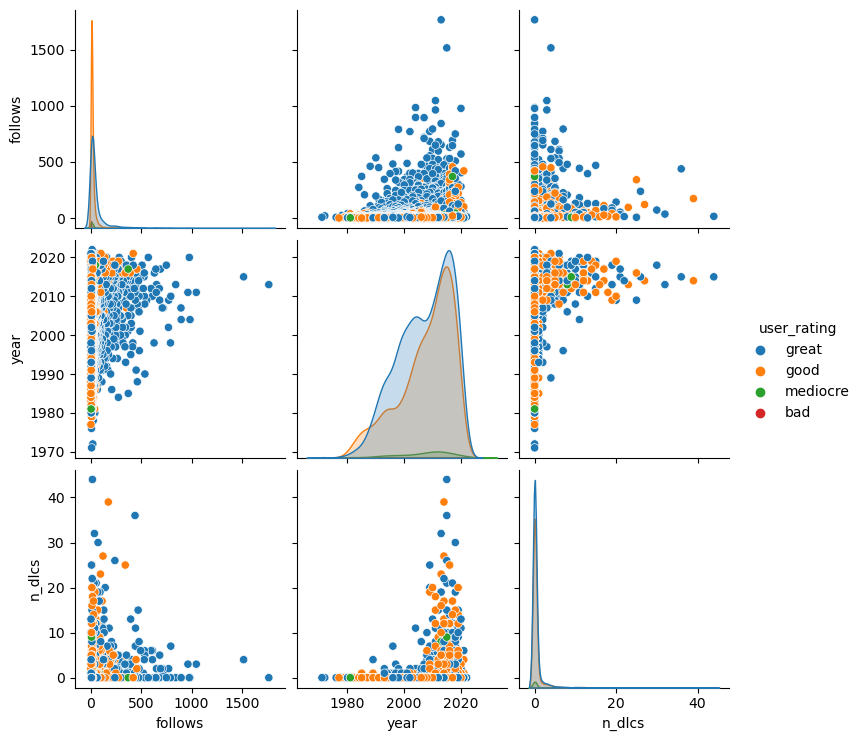

In [18]:
sb.pairplot(df_clean[['user_rating', 'follows', 'year', 'n_dlcs']], hue='user_rating')

**Violine Plot**

In [19]:
features = pd.DataFrame(list(zip(label3, label4, label5, label6, label7, label8, label9, label10, label11, target)),
                        columns=['category', 'n_dlcs', 'n_expansions', 'year', 'follows', 'in_franchise',
                                 'genres', 'companies', 'platforms', 'user_rating'])

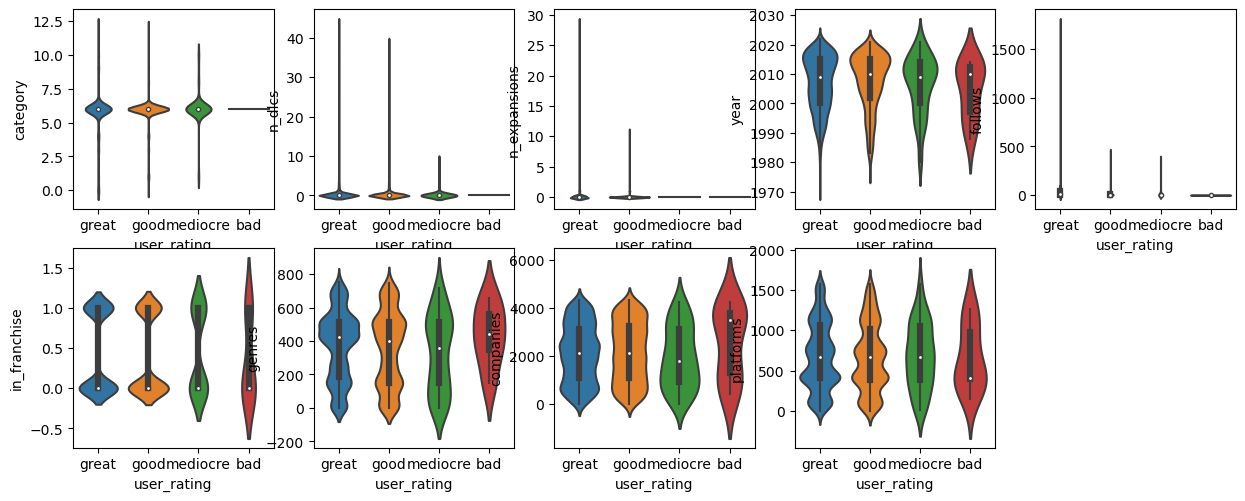

In [20]:
plt.figure(figsize=(15, 15))
for column_index, column in enumerate(features.columns):
    if column != 'user_rating':
        plt.subplot(5, 5, column_index + 1)
        sb.violinplot(x=target, y=column, data=features)

plt.show()

Como podemos observar a partir dos gráficos nem todos os dados influenciam do mesmo modo o 'rating'. Os menos impactantes são o 'n_dlcs', o 'n_expansion' e os 'follows'. Em oposição os 'genres', as 'companies', as 'platforms' e o 'year' são os mais relevantes no que diz respeito ao seu papel no 'rating'.

    -----------------------------------------------------------------------------------------------------------------------

# Classificação <a name = "classificação"></a>
[[voltar ao índice]](#indice)

## Definir o Target <a name = "target"></a>
[[voltar a classificação]](#classificação)

In [21]:
target_c = df_clean[['user_rating']]

In [22]:
target_c

,user_rating
0,great
1,great
2,great
3,great
4,great
...,...
5756,great
5757,great
5758,good
5759,good


## Teste 1 <a name = "teste_1"></a>
   - [Configuração dos Dados](#configurar_dados_1)
   - [Divisão dos Dados](#divisão_dados_1)
   - [Decision Tree](#decision_tree_1)
   - [K-NN](#k-nn_1)
   - [Importância das Variáveis](#importância_variáveis_1)
    
[[voltar a classificação]](#classificação)

Começamos por realizar os testes com todos os dados disponiveis.

### Configuração dos Dados <a name = "configurar_dados_1"></a>
[[voltar a Teste 1]](#teste_1)

In [23]:
df_clean = pd.read_csv('video_games_clean.csv')

Cada atributo do dataframe tratado está a ser convertido numa nova representação para ser usado como entrada nos modelos de machine learning.

In [24]:
label_0 = df_clean['id']
label_1 = Le.fit_transform(df_clean['name'])
label_2 = Le.fit_transform(df_clean['category'])
label_3 = df_clean['n_dlcs']
label_4 = df_clean['n_expansions']
label_5 = df_clean['year']
label_6 = df_clean['follows']
label_7 = Le.fit_transform(df_clean['in_franchise'])
label_8 = Le.fit_transform(df_clean['genres'])
label_9 = Le.fit_transform(df_clean['companies'])
label_10 = Le.fit_transform(df_clean['platforms'])
label_11 = df_clean['user_score']
label_12 = df_clean['n_user_reviews']

inputs_c = pd.DataFrame(list(zip(label_0, label_1, label_2, label_3, label_4, label_5, label_6, 
                                 label_7, label_8, label_9, label_10, label_11, label_12)),
                        columns=['id', 'name','category', 'n_dlcs', 'n_expansions', 'year', 'follows', 
                                 'in_franchise', 'genres', 'companies', 'platforms', 'user_score', 'n_user_reviews'])

In [25]:
inputs_c

,id,name,category,n_dlcs,n_expansions,year,follows,in_franchise,genres,companies,platforms,user_score,n_user_reviews
0,1020,1917,6,0,0,2013,1766,1,515,2994,733,90.202388,3369
1,1942,5001,6,4,2,2015,1516,1,427,4141,780,95.169577,2997
2,472,4701,6,3,0,2011,1046,0,427,491,669,87.508504,2567
3,72,3517,6,3,0,2011,963,1,548,4056,229,91.650705,2544
4,71,3516,6,0,0,2007,894,1,547,4054,230,86.931758,2297
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5756,721,1763,6,0,0,2005,5,0,484,1841,411,89.068175,11
5757,682,1478,6,0,0,2001,11,0,403,3518,449,80.093551,11
5758,628,741,6,0,0,2003,1,0,676,1167,449,70.855108,11
5759,317,3881,4,0,0,2006,8,1,639,1843,411,70.350237,11


### Divisão dos Dados <a name = "divisão_dados_1"></a>
[[voltar a Teste 1]](#teste_1)

- **inputs_train** = onde se vão buscar os dados
- **inputs_test** = dados escolhidos de modo random para serem testados 
- **target_train** = resultados obtidos a partir do 'treino'
- **target_test** = dados utilizados para validar os resultados do 'treino'
- **inputs_c** = conjunto de entrada que contém os atributos utilizados para treinar e testar o modelo.
- **targert_c** = conjunto de dados que contém as avaliações dos jogos que pretendenmos prever.

In [26]:
from sklearn.model_selection import train_test_split

(inputs_train,
 inputs_test,
 target_train,
 target_test) = train_test_split(inputs_c, target_c, test_size = 0.15, random_state = 1)

In [27]:
inputs_train

,id,name,category,n_dlcs,n_expansions,year,follows,in_franchise,genres,companies,platforms,user_score,n_user_reviews
1814,2241,3385,6,0,0,2013,24,1,292,2447,1270,79.831137,52
2534,5327,2921,6,0,1,2016,24,0,536,1815,240,57.342045,34
4549,10958,4869,6,0,0,2011,6,0,246,1411,86,70.776735,15
871,28414,2668,6,1,0,2017,46,1,313,3979,410,77.121554,123
4528,15756,1825,3,0,0,2005,7,0,6,531,882,61.199871,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...
905,2343,2682,6,0,0,2001,30,1,366,2529,67,75.972960,118
5192,45279,2081,0,0,0,2011,2,0,0,3361,1118,80.198144,12
3980,15389,898,6,0,0,2016,17,0,442,634,468,70.045544,18
235,133,5400,4,0,0,2003,188,1,413,568,449,87.960290,400


In [28]:
inputs_test

,id,name,category,n_dlcs,n_expansions,year,follows,in_franchise,genres,companies,platforms,user_score,n_user_reviews
2320,1777,2821,6,0,0,2004,8,1,537,1817,70,83.445926,38
4090,101461,1938,6,0,0,2019,9,0,685,844,780,88.389423,17
2423,2617,4899,0,0,0,1997,22,1,403,579,1057,92.221300,36
354,7327,5306,6,0,0,2014,116,0,165,3981,762,82.369987,293
1023,1381,3284,6,1,0,2011,37,0,514,3379,641,70.757695,104
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3861,9691,5238,6,0,0,2000,8,0,413,1619,411,83.649462,19
4219,3202,1375,6,1,0,2014,4,0,483,3863,129,69.544901,17
4353,8644,296,6,0,0,2015,5,0,526,4209,129,72.592724,16
4642,1467,4094,6,0,0,2000,4,1,514,2601,368,79.778033,15


In [29]:
target_train

,user_rating
1814,great
2534,good
4549,good
871,great
4528,good
...,...
905,great
5192,great
3980,good
235,great


In [30]:
target_test

,user_rating
2320,great
4090,great
2423,great
354,great
1023,good
...,...
3861,great
4219,good
4353,good
4642,great


### Decision Tree <a name = "decision_tree_1"></a>
[[voltar a Teste 1]](#teste_1)

Começamos por calcular um score e seguimos para a realização de sucessivos testes com o intuito de calcular a média do score. Em seguida, é feito um loop que avalia a 'Decision Tree' várias vezes e armazena os resultados no nivel de precisão numa lista. 

In [31]:
from sklearn.tree import DecisionTreeClassifier

#tempo
tempo_i = time.time()

dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(inputs_test, target_test)
dt_score = dt_classifier.score(inputs_train, target_train)

tempo_f = time.time()
duracao = (tempo_f - tempo_i)

print("Score desicion tree:", dt_score)
print("Tempo que demorou: {:.3f} segundos \n".format(duracao))

Score desicion tree: 0.9967320261437909
Tempo que demorou: 0.013 segundos 



Tempo que demorou: 1.100 segundos 



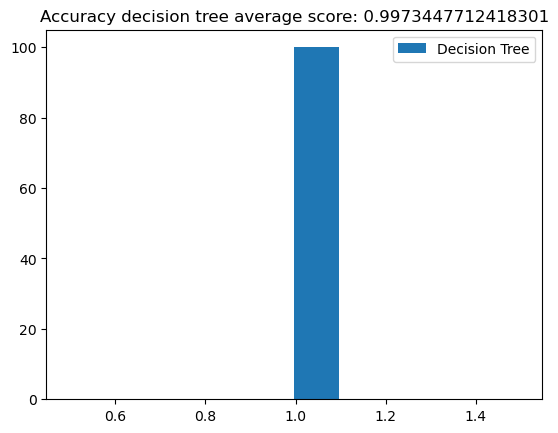

In [32]:
model_accuracies_dt = []

tempo_i = time.time()

for repetition in range(100):
    inputs_train, inputs_test, target_train, target_test = train_test_split(inputs_c,target_c,test_size=0.15,random_state=42)
    
    dt_classifier = DecisionTreeClassifier()
    dt_classifier.fit(inputs_test, target_test)
    dt_classifier_accuracy = dt_classifier.score(inputs_train, target_train)
    model_accuracies_dt.append(dt_classifier_accuracy)

tempo_f = time.time()
duracao = (tempo_f - tempo_i)
print("Tempo que demorou: {:.3f} segundos \n".format(duracao))

plt.hist(model_accuracies_dt, label ='Decision Tree')
plt.title('Accuracy decision tree average score: {}'.format(np.average(dt_classifier_accuracy)));
plt.legend()
plt.show()

### K-NN <a name = "k-nn_1"></a>
[[voltar a Teste 1]](#teste_1)

Repetimos o processo relizado em [Decision Tree](#decision_tree_1) e comparamos os dados.

In [33]:
from sklearn.neighbors import KNeighborsClassifier

tempo_i = time.time()

knn_classifier = KNeighborsClassifier()
knn_classifier.fit(inputs_train, target_train.values.ravel()) #By using values.ravel(), you ensure that the target variable is converted to a 1-dimensional array. 
knn_score = knn_classifier.score(inputs_test, target_test.values.ravel()) 

tempo_f = time.time()
duracao = (tempo_f - tempo_i)

print("Score knn:", knn_score)
print("Tempo que demorou: {:.3f} segundos \n".format(duracao))

Score knn: 0.5421965317919075
Tempo que demorou: 0.048 segundos 



Tempo que demorou: 4.300 segundos 



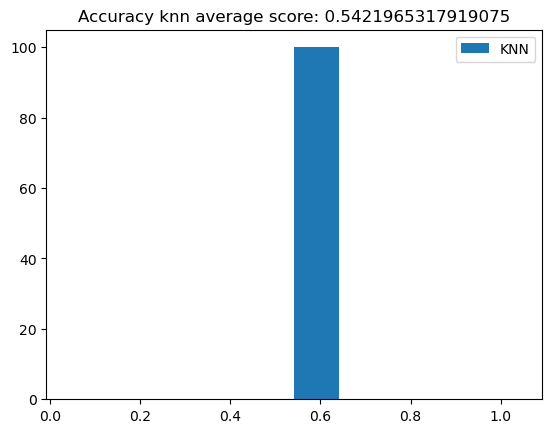

In [34]:
model_accuracies_knn = []

tempo_i = time.time()

for repetition in range(100):
    inputs_train, inputs_test, target_train, target_test = train_test_split(inputs_c,target_c,test_size=0.15,random_state=42)
    
    knn_classifier = KNeighborsClassifier()
    knn_classifier.fit(inputs_train, target_train.values.ravel())
    knn_classifier_accuracy = knn_classifier.score(inputs_test, target_test.values.ravel())
    model_accuracies_knn.append(knn_classifier_accuracy)

tempo_f = time.time()
duracao = (tempo_f - tempo_i)
print("Tempo que demorou: {:.3f} segundos \n".format(duracao))

plt.hist(model_accuracies_knn, label='KNN')
plt.title('Accuracy knn average score: {}'.format(np.average(knn_classifier_accuracy)));
plt.legend()
plt.show()

### Importância das Variáveis <a name = "importância_variáveis_1"></a>
[[voltar a Teste 1]](#teste_1)



In [35]:
def importance(classifier):
    feature_importance=pd.DataFrame({'feature':inputs_train.columns,
                             'importance':np.round(classifier.feature_importances_, 3)})
    feature_importance.sort_values('importance',ascending=False, inplace =True)
    feature_importance = feature_importance[feature_importance.importance > 0]
    return feature_importance

In [36]:
importance(dt_classifier)

,feature,importance
11,user_score,1.0


Ao usarmos o 'user_score' como um atributo, os dados ficam de certo modo 'viciados'. Tal acontece dado que o 'user_score' e o 'user_rating' representam os mesmos dados, apesar de se encontrarem dispostos num formato diferente.

                                            ----- ----- ----- ----- -----

## Teste 2 <a name = "teste_2"></a>
   - [Configuração dos Dados](#configurar_dados_2)
   - [Divisão dos Dados](#divisão_dados_2)
   - [Decision Tree](#decision_tree_2)
   - [K-NN](#k-nn_2)
   - [Cross-Validation](#cross_validation_2)
   - [Importância das Variáveis](#importância_variáveis_2)
    
[[voltar a classificação]](#classificação)

Após realizar o [Teste 1](#teste_1), concluimos que utilizar o 'user_score' vai influenciar os dados de tal modo que devemos realizar outros testes sem o seu uso. Por este motivo, os restantes testes não irão utilizar o 'user_sore'.

(Removemos o 'user_score')

### Configuração dos Dados <a name = "configurar_dados_2"></a>
[[voltar a Teste 2]](#teste_2)

In [37]:
df_clean = pd.read_csv('video_games_clean.csv')

In [38]:
label_0 = df_clean['id']
label_1 = Le.fit_transform(df_clean['name'])
label_2 = Le.fit_transform(df_clean['category'])
label_3 = df_clean['n_dlcs']
label_4 = df_clean['n_expansions']
label_5 = df_clean['year']
label_6 = df_clean['follows']
label_7 = Le.fit_transform(df_clean['in_franchise'])
label_8 = Le.fit_transform(df_clean['genres'])
label_9 = Le.fit_transform(df_clean['companies'])
label_10 = Le.fit_transform(df_clean['platforms'])
label_11 = df_clean['n_user_reviews']

inputs_2 = pd.DataFrame(list(zip(label_0, label_1, label_2, label_3, label_4, label_5, label_6, 
                                 label_7, label_8, label_9, label_10, label_11)),
                        columns=['id', 'name','category', 'n_dlcs', 'n_expansions', 'year', 'follows', 
                                 'in_franchise', 'genres', 'companies', 'platforms', 'n_user_reviews'])

In [39]:
inputs_2

,id,name,category,n_dlcs,n_expansions,year,follows,in_franchise,genres,companies,platforms,n_user_reviews
0,1020,1917,6,0,0,2013,1766,1,515,2994,733,3369
1,1942,5001,6,4,2,2015,1516,1,427,4141,780,2997
2,472,4701,6,3,0,2011,1046,0,427,491,669,2567
3,72,3517,6,3,0,2011,963,1,548,4056,229,2544
4,71,3516,6,0,0,2007,894,1,547,4054,230,2297
...,...,...,...,...,...,...,...,...,...,...,...,...
5756,721,1763,6,0,0,2005,5,0,484,1841,411,11
5757,682,1478,6,0,0,2001,11,0,403,3518,449,11
5758,628,741,6,0,0,2003,1,0,676,1167,449,11
5759,317,3881,4,0,0,2006,8,1,639,1843,411,11


### Divisão dos Dados <a name = "divisão_dados_2"></a>
[[voltar a Teste 2]](#teste_2)

- **inputs_train_2** = onde se vão buscar os dados
- **inputs_test_2** = dados escolhidos de modo random para serem testados 
- **target_train_2** = resultados obtidos a partir do 'treino'
- **target_test_2** = dados utilizados para validar os resultados do 'treino'
- **inputs_2** = conjunto de entrada que contém os atributos utilizados para treinar e testar o modelo.
- **targert_c** = conjunto de dados que contém as avaliações dos jogos que pretendenmos prever.

In [40]:
from sklearn.model_selection import train_test_split

(inputs_train_2,
 inputs_test_2,
 target_train_2,
 target_test_2) = train_test_split(inputs_2, target_c, test_size = 0.15, random_state = 1)

In [41]:
inputs_train_2

,id,name,category,n_dlcs,n_expansions,year,follows,in_franchise,genres,companies,platforms,n_user_reviews
1814,2241,3385,6,0,0,2013,24,1,292,2447,1270,52
2534,5327,2921,6,0,1,2016,24,0,536,1815,240,34
4549,10958,4869,6,0,0,2011,6,0,246,1411,86,15
871,28414,2668,6,1,0,2017,46,1,313,3979,410,123
4528,15756,1825,3,0,0,2005,7,0,6,531,882,15
...,...,...,...,...,...,...,...,...,...,...,...,...
905,2343,2682,6,0,0,2001,30,1,366,2529,67,118
5192,45279,2081,0,0,0,2011,2,0,0,3361,1118,12
3980,15389,898,6,0,0,2016,17,0,442,634,468,18
235,133,5400,4,0,0,2003,188,1,413,568,449,400


In [42]:
inputs_test_2

,id,name,category,n_dlcs,n_expansions,year,follows,in_franchise,genres,companies,platforms,n_user_reviews
2320,1777,2821,6,0,0,2004,8,1,537,1817,70,38
4090,101461,1938,6,0,0,2019,9,0,685,844,780,17
2423,2617,4899,0,0,0,1997,22,1,403,579,1057,36
354,7327,5306,6,0,0,2014,116,0,165,3981,762,293
1023,1381,3284,6,1,0,2011,37,0,514,3379,641,104
...,...,...,...,...,...,...,...,...,...,...,...,...
3861,9691,5238,6,0,0,2000,8,0,413,1619,411,19
4219,3202,1375,6,1,0,2014,4,0,483,3863,129,17
4353,8644,296,6,0,0,2015,5,0,526,4209,129,16
4642,1467,4094,6,0,0,2000,4,1,514,2601,368,15


In [43]:
target_train_2

,user_rating
1814,great
2534,good
4549,good
871,great
4528,good
...,...
905,great
5192,great
3980,good
235,great


In [44]:
target_test_2

,user_rating
2320,great
4090,great
2423,great
354,great
1023,good
...,...
3861,great
4219,good
4353,good
4642,great


### Decision Tree <a name = "decision_tree_2"></a>
[[voltar a Teste 2]](#teste_2)

In [45]:
from sklearn.tree import DecisionTreeClassifier

tempo_i = time.time()

dt_classifier_2 = DecisionTreeClassifier()
dt_classifier_2.fit(inputs_test_2, target_test_2)
dt_score_2 = dt_classifier_2.score(inputs_train_2, target_train_2)

tempo_f = time.time()
duracao = (tempo_f - tempo_i)

print("Score desicion tree:", dt_score_2)
print("Tempo que demorou: {:.3f} segundos \n".format(duracao))

Score desicion tree: 0.5680147058823529
Tempo que demorou: 0.019 segundos 



Tempo que demorou: 1.935 segundos 



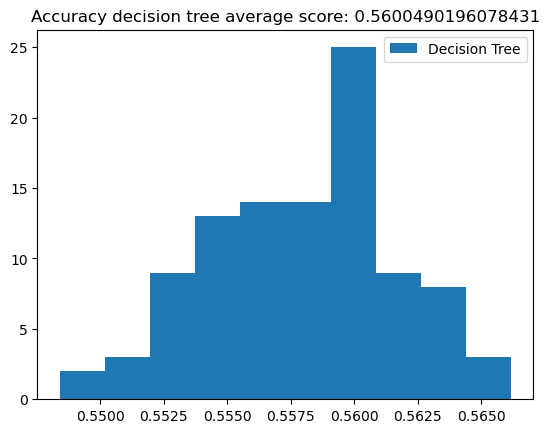

In [46]:
model_accuracies_dt_2 = []

tempo_i = time.time()

for repetition in range(100):
    inputs_train_2, inputs_test_2, target_train_2, target_test_2 = train_test_split(inputs_2,target_c,test_size=0.15,random_state=42)
    
    dt_classifier_2 = DecisionTreeClassifier()
    dt_classifier_2.fit(inputs_test_2, target_test_2)
    dt_classifier_accuracy_2 = dt_classifier_2.score(inputs_train_2, target_train_2)
    model_accuracies_dt_2.append(dt_classifier_accuracy_2)
    
tempo_f = time.time()
duracao = (tempo_f - tempo_i)
print("Tempo que demorou: {:.3f} segundos \n".format(duracao))

plt.hist(model_accuracies_dt_2, label ='Decision Tree')
plt.title('Accuracy decision tree average score: {}'.format(np.average(dt_classifier_accuracy_2)));
plt.legend()
plt.show()

### K-NN <a name = "k-nn_2"></a>
[[voltar a Teste 2]](#teste_2)

In [47]:
from sklearn.neighbors import KNeighborsClassifier

tempo_i = time.time()

knn_classifier_2 = KNeighborsClassifier()
knn_classifier_2.fit(inputs_train_2, target_train_2.values.ravel()) #By using values.ravel(), you ensure that the target variable is converted to a 1-dimensional array. 
knn_score_2 = knn_classifier_2.score(inputs_test_2, target_test_2.values.ravel()) 

tempo_f = time.time()
duracao = (tempo_f - tempo_i)


print("Score knn:", knn_score_2)
print("Tempo que demorou: {:.3f} segundos \n".format(duracao))

Score knn: 0.5421965317919075
Tempo que demorou: 0.045 segundos 



Tempo que demorou: 3.933 segundos 



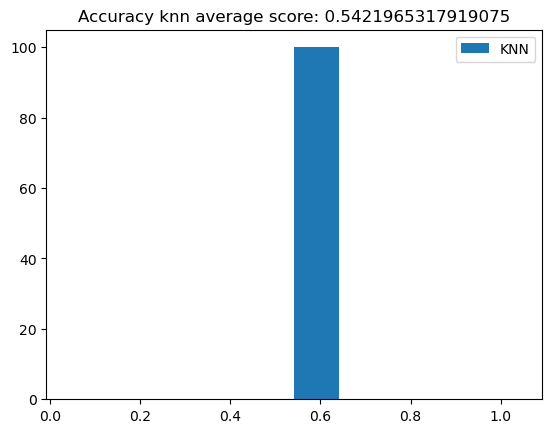

In [48]:
model_accuracies_knn_2 = []

tempo_i = time.time()

for repetition in range(100):
    inputs_train_2, inputs_test_2, target_train_2, target_test_2 = train_test_split(inputs_2,target_c,test_size=0.15,random_state=42)
    
    knn_classifier_2 = KNeighborsClassifier()
    knn_classifier_2.fit(inputs_train_2, target_train_2.values.ravel())
    knn_classifier_accuracy_2 = knn_classifier_2.score(inputs_test_2, target_test_2.values.ravel()) 
    model_accuracies_knn_2.append(knn_classifier_accuracy_2)
    
tempo_f = time.time()
duracao = (tempo_f - tempo_i)
print("Tempo que demorou: {:.3f} segundos \n".format(duracao))

plt.hist(model_accuracies_knn_2, label='KNN')
plt.title('Accuracy knn average score: {}'.format(np.average(knn_classifier_accuracy_2)));
plt.legend()
plt.show()

### Cross-Validation <a name = "cross_validation_2"></a>
[[voltar a Teste 2]](#teste_2)

A Cross-Validation é uma técnica utilizada em machine learning para avaliar o desempenho e capacidade de generalização de um modelo.

In [49]:
def cross(classifier):
    X_train, X_test, y_train, y_test = train_test_split(inputs_train_2, target_train_2, test_size=0.15)
    classifier.fit(X_train, np.array(y_train).ravel())
    cv_scores = cross_val_score(classifier, X_train, np.array(y_train).ravel(), cv=4)
    plt.hist(cv_scores)
    plt.title('Cross validation score: {}'.format(np.mean(cv_scores)))


#### Decision Tree

C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=4.
  warnings.warn(


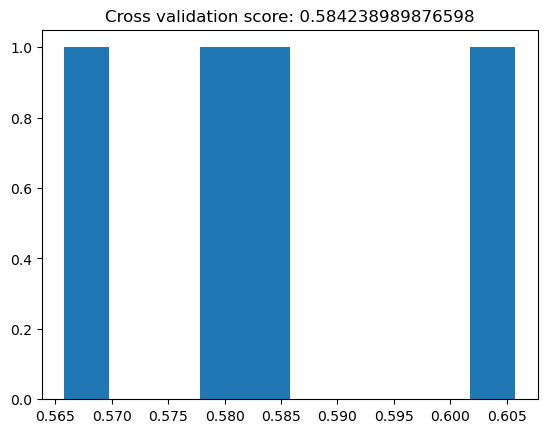

In [50]:
dt_classifier_2 = DecisionTreeClassifier()
dt2 = dt_classifier_2.fit(inputs_train_2, target_train_2)
cross(dt2)


#### K-NN

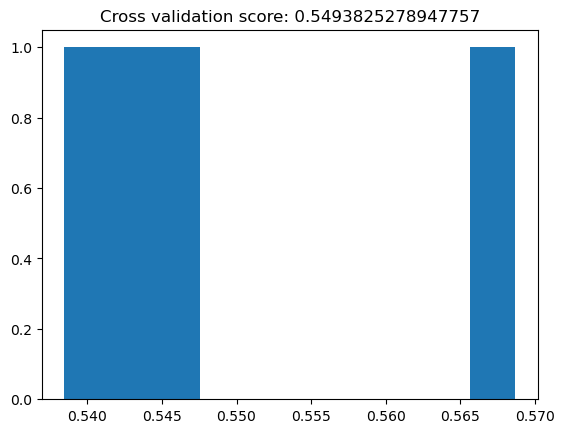

In [51]:
knn_classifier_2 = KNeighborsClassifier()
knn2 = knn_classifier_2.fit(inputs_train_2, target_train_2.values.ravel())
cross(knn2)

Concluimos, que, para este conjunto de dados, a decision tree é mais eficaz.

### Importância das Variáveis <a name = "importância_variáveis_2"></a>
[[voltar a Teste 2]](#teste_2)

Podemos agora observar qual a importância de cada variável na classificação dos jogos, de modo a compreender se é possivel realizar testes sem algumas destas variáveis, o que pode aumentar a capacidade de sucesso dos modelos.

In [52]:
def importance(classifier):
    feature_importance=pd.DataFrame({'feature':inputs_train_2.columns,
                             'importance':np.round(classifier.feature_importances_, 3)})
    feature_importance.sort_values('importance',ascending=False, inplace =True)
    feature_importance_2 = feature_importance[feature_importance.importance > 0]
    return feature_importance_2

In [53]:
importance(dt_classifier_2)

,feature,importance
11,n_user_reviews,0.148
0,id,0.143
9,companies,0.125
10,platforms,0.125
1,name,0.119
6,follows,0.094
8,genres,0.094
5,year,0.087
2,category,0.028
3,n_dlcs,0.020


Como podemos confirmar nem todas as informações que nos foram dadas relativamente aos jogos tem um peso significativo na sua avaliação. Vamos repetir os testes, mas desta vez usaremos uma seleção mais reduzida dos dados fornecidos.

                                            ----- ----- ----- ----- -----

## Teste 3 <a name = "teste_3"></a>
   - [Configuração dos Dados](#configurar_dados_3)
   - [Divisão dos Dados](#divisão_dados_3)
   - [Decision Tree](#decision_tree_3)
   - [K-NN](#k-nn_3)
   - [Cross-Validation](#cross_validation_3)
   - [Importância das Variáveis](#importância_variáveis_3)
    
[[voltar a classificação]](#classificação)

Após realizar o [Teste 2](#teste_2), concluimos que nem todos os parâmetros disponiveis são necessáriamente relevantes para a realização do projeto. Tendo isto em conta vamos remover aqueles que demonstraram ser menos significantes para a avaliação e repetir os testes.

(Removemos todos aqueles parâmetros que apresentavam uma importância inferior a 0.08, sendo estes: 'category', 'in_franchise', 'n_dlcs', 'n_expansions')

### Configuração dos Dados <a name = "configurar_dados_3"></a>
[[voltar a Teste 3]](#teste_3)

In [54]:
df_clean = pd.read_csv('video_games_clean.csv')

In [55]:
label_0 = df_clean['id']
label_1 = Le.fit_transform(df_clean['name'])
label_5 = df_clean['year']
label_6 = df_clean['follows']
label_8 = Le.fit_transform(df_clean['genres'])
label_9 = Le.fit_transform(df_clean['companies'])
label_10 = Le.fit_transform(df_clean['platforms'])
label_12 = df_clean['n_user_reviews']

inputs_3 = pd.DataFrame(list(zip(label_0, label_1, label_5, label_6, 
                                label_8, label_9, label_10, label_12)),
                        columns=['id', 'name', 'year', 'follows', 
                                 'genres', 'companies', 'platforms', 'n_user_reviews'])

In [56]:
inputs_3

,id,name,year,follows,genres,companies,platforms,n_user_reviews
0,1020,1917,2013,1766,515,2994,733,3369
1,1942,5001,2015,1516,427,4141,780,2997
2,472,4701,2011,1046,427,491,669,2567
3,72,3517,2011,963,548,4056,229,2544
4,71,3516,2007,894,547,4054,230,2297
...,...,...,...,...,...,...,...,...
5756,721,1763,2005,5,484,1841,411,11
5757,682,1478,2001,11,403,3518,449,11
5758,628,741,2003,1,676,1167,449,11
5759,317,3881,2006,8,639,1843,411,11


### Divisão dos Dados <a name = "divisão_dados_3"></a>
[[voltar a Teste 3]](#teste_3)

- **inputs_train_3** = onde se vão buscar os dados
- **inputs_test_3** = dados escolhidos de modo random para serem testados 
- **target_train_3** = resultados obtidos a partir do 'treino'
- **target_test_3** = dados utilizados para validar os resultados do 'treino'
- **inputs_3** = conjunto de entrada que contém os atributos utilizados para treinar e testar o modelo.
- **targert_c** = conjunto de dados que contém as avaliações dos jogos que pretendenmos prever.

In [57]:
from sklearn.model_selection import train_test_split

(inputs_train_3,
 inputs_test_3,
 target_train_3,
 target_test_3) = train_test_split(inputs_3, target_c, test_size = 0.15, random_state = 1)

In [58]:
inputs_train_3

,id,name,year,follows,genres,companies,platforms,n_user_reviews
1814,2241,3385,2013,24,292,2447,1270,52
2534,5327,2921,2016,24,536,1815,240,34
4549,10958,4869,2011,6,246,1411,86,15
871,28414,2668,2017,46,313,3979,410,123
4528,15756,1825,2005,7,6,531,882,15
...,...,...,...,...,...,...,...,...
905,2343,2682,2001,30,366,2529,67,118
5192,45279,2081,2011,2,0,3361,1118,12
3980,15389,898,2016,17,442,634,468,18
235,133,5400,2003,188,413,568,449,400


In [59]:
inputs_test_3

,id,name,year,follows,genres,companies,platforms,n_user_reviews
2320,1777,2821,2004,8,537,1817,70,38
4090,101461,1938,2019,9,685,844,780,17
2423,2617,4899,1997,22,403,579,1057,36
354,7327,5306,2014,116,165,3981,762,293
1023,1381,3284,2011,37,514,3379,641,104
...,...,...,...,...,...,...,...,...
3861,9691,5238,2000,8,413,1619,411,19
4219,3202,1375,2014,4,483,3863,129,17
4353,8644,296,2015,5,526,4209,129,16
4642,1467,4094,2000,4,514,2601,368,15


In [60]:
target_train_3

,user_rating
1814,great
2534,good
4549,good
871,great
4528,good
...,...
905,great
5192,great
3980,good
235,great


In [61]:
target_test_3

,user_rating
2320,great
4090,great
2423,great
354,great
1023,good
...,...
3861,great
4219,good
4353,good
4642,great


### Decision Tree <a name = "decision_tree_3"></a>
[[voltar a Teste 3]](#teste_3)

In [62]:
from sklearn.tree import DecisionTreeClassifier

tempo_i = time.time()

dt_classifier_3 = DecisionTreeClassifier()
dt_classifier_3.fit(inputs_test_3, target_test_3)
dt_score_3 = dt_classifier_3.score(inputs_train_3, target_train_3)

tempo_f = time.time()
duracao = (tempo_f - tempo_i)

print("Score desicion tree:", dt_score_3)
print("Tempo que demorou: {:.3f} segundos \n".format(duracao))

Score desicion tree: 0.5753676470588235
Tempo que demorou: 0.014 segundos 



Tempo que demorou: 1.365 segundos 



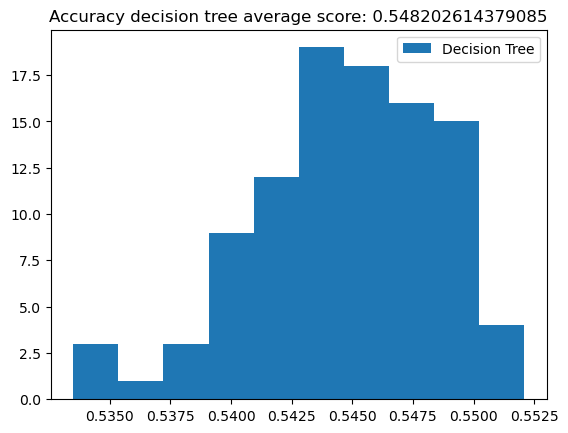

In [63]:
model_accuracies_dt_3 = []

tempo_i = time.time()

for repetition in range(100):
    inputs_train_3, inputs_test_3, target_train_3, target_test_3 = train_test_split(inputs_3,target_c,test_size=0.15,random_state=42)
    
    dt_classifier_3 = DecisionTreeClassifier()
    dt_classifier_3.fit(inputs_test_3, target_test_3)
    dt_classifier_accuracy_3 = dt_classifier_3.score(inputs_train_3, target_train_3)
    model_accuracies_dt_3.append(dt_classifier_accuracy_3)
    
tempo_f = time.time()
duracao = (tempo_f - tempo_i)
print("Tempo que demorou: {:.3f} segundos \n".format(duracao))
    
plt.hist(model_accuracies_dt_3, label ='Decision Tree')
plt.title('Accuracy decision tree average score: {}'.format(np.average(dt_classifier_accuracy_3)));
plt.legend()
plt.show()

### K-NN <a name = "k-nn_3"></a>
[[voltar a Teste 3]](#teste_3)

In [64]:
from sklearn.neighbors import KNeighborsClassifier

tempo_i = time.time()

knn_classifier_3 = KNeighborsClassifier()
knn_classifier_3.fit(inputs_train_3, target_train_3.values.ravel()) #By using values.ravel(), you ensure that the target variable is converted to a 1-dimensional array. 
knn_score_3 = knn_classifier_3.score(inputs_test_3, target_test_3.values.ravel()) 

tempo_f = time.time()
duracao = (tempo_f - tempo_i)

print("Score knn:", knn_score_3)
print("Tempo que demorou: {:.3f} segundos \n".format(duracao))

Score knn: 0.5421965317919075
Tempo que demorou: 0.038 segundos 



Tempo que demorou: 3.543 segundos 



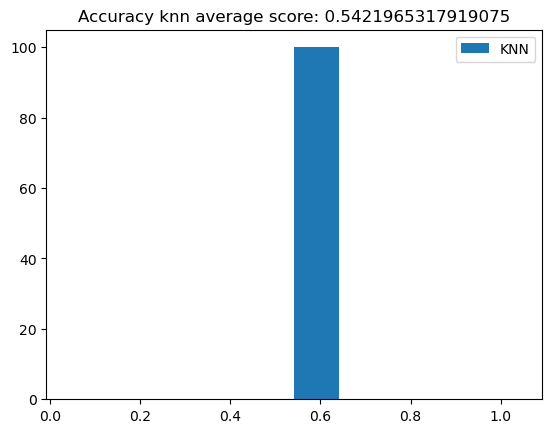

In [65]:
model_accuracies_knn_3 = []

tempo_i = time.time()

for repetition in range(100):
    inputs_train_3, inputs_test_3, target_train_3, target_test_3 = train_test_split(inputs_3,target_c,test_size=0.15,random_state=42)
    
    knn_classifier_3 = KNeighborsClassifier()
    knn_classifier_3.fit(inputs_train_3, target_train_3.values.ravel())
    knn_classifier_accuracy_3 = knn_classifier_3.score(inputs_test_3, target_test_3.values.ravel()) 
    model_accuracies_knn_3.append(knn_classifier_accuracy_3)
    
tempo_f = time.time()
duracao = (tempo_f - tempo_i)
print("Tempo que demorou: {:.3f} segundos \n".format(duracao))
    
plt.hist(model_accuracies_knn_3, label='KNN')
plt.title('Accuracy knn average score: {}'.format(np.average(knn_classifier_accuracy_3)));
plt.legend()
plt.show()

### Cross-Validation <a name = "cross_validation_3"></a>
[[voltar a Teste 3]](#teste_3)

In [66]:
def cross(classifier):
    X_train, X_test, y_train, y_test = train_test_split(inputs_train_3, target_train_3, test_size=0.15)
    classifier.fit(X_train, np.array(y_train).ravel())
    cv_scores = cross_val_score(classifier, X_train, np.array(y_train).ravel(), cv=3)
    plt.hist(cv_scores)
    plt.title('Cross validation score: {}'.format(np.mean(cv_scores)))


#### Decision Tree

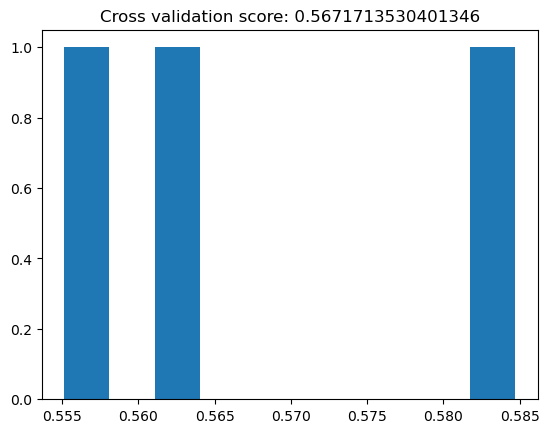

In [67]:
dt_classifier_3 = DecisionTreeClassifier()
dt3 = dt_classifier_3.fit(inputs_train_3, target_train_3)
cross(dt3)

#### K-NN

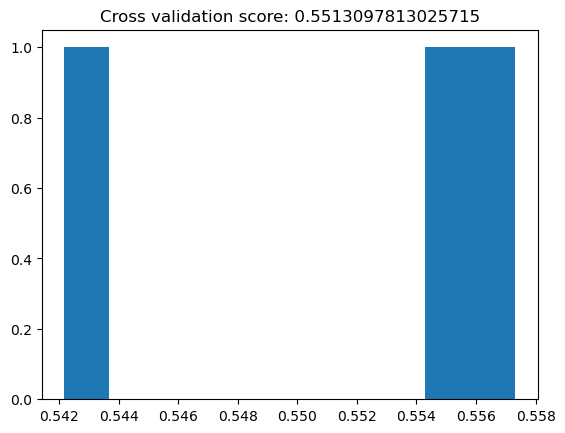

In [68]:
knn_classifier_3 = KNeighborsClassifier()
knn3 = knn_classifier_3.fit(inputs_train_3, target_train_3.values.ravel())
cross(knn3)

Tal como no teste anteriore, a decision tree é mais adequada que o K-NN.

### Importância das Variáveis <a name = "importância_variáveis_3"></a>
[[voltar a Teste 3]](#teste_3)

In [69]:
def importance(classifier):
    feature_importance=pd.DataFrame({'feature':inputs_train_3.columns,
                             'importance':np.round(classifier.feature_importances_, 3)})
    feature_importance.sort_values('importance',ascending=False, inplace =True)
    feature_importance_3 = feature_importance[feature_importance.importance > 0]
    return feature_importance_3

In [70]:
importance(dt_classifier_3)

,feature,importance
0,id,0.177
7,n_user_reviews,0.154
5,companies,0.135
1,name,0.127
6,platforms,0.111
4,genres,0.102
3,follows,0.099
2,year,0.095


Concluimos que remover as 'features' com menos relevância no processo não altera significativamente os resultados.

                                            ----- ----- ----- ----- -----

## Teste 4 <a name = "teste_4"></a>
   - [Configuração dos Dados](#configurar_dados_4)
   - [Divisão dos Dados](#divisão_dados_4)
   - [Decision Tree](#decision_tree_4)
   - [K-NN](#k-nn_4)
   - [Cross-Validation](#cross_validation_4)
   - [Importância das Variáveis](#importância_variáveis_4)
    
[[voltar a classificação]](#classificação)

Após realizar os teste: [Teste 2](#teste_2) e [Teste 3](#teste_3), chegamos à conclusão de que remover parâmetros que não influenciam a grande escala os resultados, parece não oferecer valores discrepantes nos testes. Este acontecimento levanta a questão: 'Que parâmetros são realmente impactantes?'


Vamos portanto testar se o 'nome' do jogo e o seu 'id' são assim tão relevantes para o tratamento de dados ou se tais valores se devem ao facto de cada jogo possuir um nome e um id diferentes.

(Removemos os seguintes parâmetros: 'id', 'name','category', 'in_franchise', 'n_dlcs', 'n_expansions')

### Configuração dos Dados <a name = "configurar_dados_4"></a>
[[voltar a Teste 4]](#teste_4)

In [71]:
df_clean = pd.read_csv('video_games_clean.csv')

In [72]:
label_0 = df_clean['year']
label_1 = df_clean['follows']
label_2 = Le.fit_transform(df_clean['genres'])
label_3 = Le.fit_transform(df_clean['companies'])
label_4 = Le.fit_transform(df_clean['platforms'])
label_5 = df_clean['n_user_reviews']

inputs_4 = pd.DataFrame(list(zip(label_0, label_1, label_2, label_3, label_4, label_5)),
                        columns=['year', 'follows', 'genres', 'companies', 'platforms', 'n_user_reviews'])

In [73]:
inputs_4

,year,follows,genres,companies,platforms,n_user_reviews
0,2013,1766,515,2994,733,3369
1,2015,1516,427,4141,780,2997
2,2011,1046,427,491,669,2567
3,2011,963,548,4056,229,2544
4,2007,894,547,4054,230,2297
...,...,...,...,...,...,...
5756,2005,5,484,1841,411,11
5757,2001,11,403,3518,449,11
5758,2003,1,676,1167,449,11
5759,2006,8,639,1843,411,11


### Divisão dos Dados <a name = "divisão_dados_4"></a>
[[voltar a Teste 4]](#teste_4)

- **inputs_train_4** = onde se vão buscar os dados
- **inputs_test_4** = dados escolhidos de modo random para serem testados 
- **target_train_4** = resultados obtidos a partir do 'treino'
- **target_test_4** = dados utilizados para validar os resultados do 'treino'
- **inputs_4** = conjunto de entrada que contém os atributos utilizados para treinar e testar o modelo.
- **targert_c** = conjunto de dados que contém as avaliações dos jogos que pretendenmos prever.

In [74]:
from sklearn.model_selection import train_test_split

(inputs_train_4,
 inputs_test_4,
 target_train_4,
 target_test_4) = train_test_split(inputs_4, target_c, test_size = 0.15, random_state = 1)

In [75]:
inputs_train_4

,year,follows,genres,companies,platforms,n_user_reviews
1814,2013,24,292,2447,1270,52
2534,2016,24,536,1815,240,34
4549,2011,6,246,1411,86,15
871,2017,46,313,3979,410,123
4528,2005,7,6,531,882,15
...,...,...,...,...,...,...
905,2001,30,366,2529,67,118
5192,2011,2,0,3361,1118,12
3980,2016,17,442,634,468,18
235,2003,188,413,568,449,400


In [76]:
inputs_test_4

,year,follows,genres,companies,platforms,n_user_reviews
2320,2004,8,537,1817,70,38
4090,2019,9,685,844,780,17
2423,1997,22,403,579,1057,36
354,2014,116,165,3981,762,293
1023,2011,37,514,3379,641,104
...,...,...,...,...,...,...
3861,2000,8,413,1619,411,19
4219,2014,4,483,3863,129,17
4353,2015,5,526,4209,129,16
4642,2000,4,514,2601,368,15


In [77]:
target_train_4

,user_rating
1814,great
2534,good
4549,good
871,great
4528,good
...,...
905,great
5192,great
3980,good
235,great


In [78]:
target_test_4

,user_rating
2320,great
4090,great
2423,great
354,great
1023,good
...,...
3861,great
4219,good
4353,good
4642,great


### Decision Tree <a name = "decision_tree_4"></a>
[[voltar a Teste 4]](#teste_4)

In [79]:
from sklearn.tree import DecisionTreeClassifier

tempo_i = time.time()

dt_classifier_4 = DecisionTreeClassifier()
dt_classifier_4.fit(inputs_test_4, target_test_4)
dt_score_4 = dt_classifier_4.score(inputs_train_4, target_train_4)

tempo_f = time.time()
duracao = (tempo_f - tempo_i)

print("Score desicion tree:", dt_score_4)
print("Tempo que demorou: {:.3f} segundos \n".format(duracao))

Score desicion tree: 0.5676062091503268
Tempo que demorou: 0.022 segundos 



Tempo que demorou: 1.219 segundos 



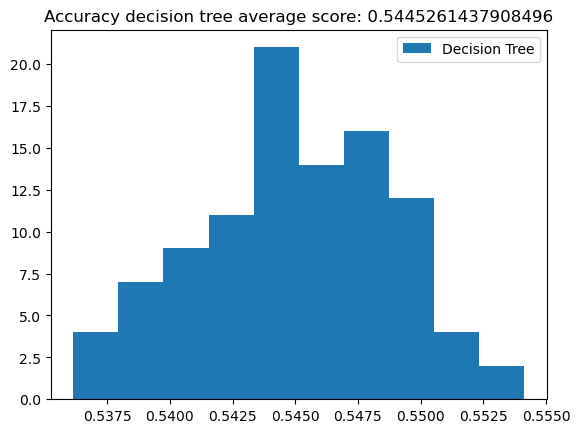

In [80]:
model_accuracies_dt_4 = []

tempo_i = time.time()

for repetition in range(100):
    inputs_train_4, inputs_test_4, target_train_4, target_test_4 = train_test_split(inputs_4,target_c,test_size=0.15,random_state=42)
    
    dt_classifier_4 = DecisionTreeClassifier()
    dt_classifier_4.fit(inputs_test_4, target_test_4)
    dt_classifier_accuracy_4 = dt_classifier_4.score(inputs_train_4, target_train_4)
    model_accuracies_dt_4.append(dt_classifier_accuracy_4)
    
tempo_f = time.time()
duracao = (tempo_f - tempo_i)
print("Tempo que demorou: {:.3f} segundos \n".format(duracao))
    
plt.hist(model_accuracies_dt_4, label ='Decision Tree')
plt.title('Accuracy decision tree average score: {}'.format(np.average(dt_classifier_accuracy_4)));
plt.legend()
plt.show()

### K-NN <a name = "k-nn_4"></a>
[[voltar a Teste 4]](#teste_4)

In [81]:
from sklearn.neighbors import KNeighborsClassifier

tempo_i = time.time()

knn_classifier_4 = KNeighborsClassifier()
knn_classifier_4.fit(inputs_train_4, target_train_4.values.ravel()) #By using values.ravel(), you ensure that the target variable is converted to a 1-dimensional array. 
knn_score_4 = knn_classifier_4.score(inputs_test_4, target_test_4.values.ravel()) 

tempo_f = time.time()
duracao = (tempo_f - tempo_i)

print("Score knn:", knn_score_4)
print("Tempo que demorou: {:.3f} segundos \n".format(duracao))

Score knn: 0.5872832369942197
Tempo que demorou: 0.042 segundos 



Tempo que demorou: 3.803 segundos 



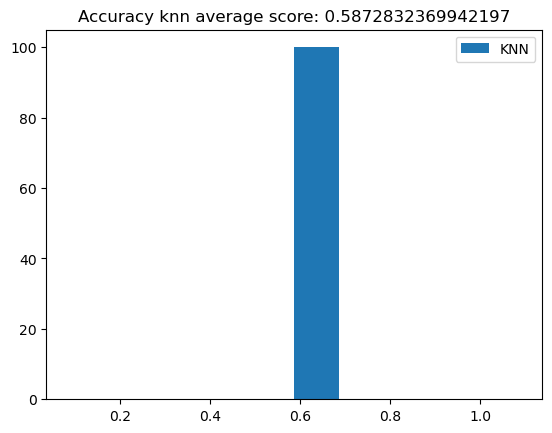

In [82]:
model_accuracies_knn_4 = []

tempo_i = time.time()

for repetition in range(100):
    inputs_train_4, inputs_test_4, target_train_4, target_test_4 = train_test_split(inputs_4,target_c,test_size=0.15,random_state=42)
    
    knn_classifier_4 = KNeighborsClassifier()
    knn_classifier_4.fit(inputs_train_4, target_train_4.values.ravel())
    knn_classifier_accuracy_4 = knn_classifier_4.score(inputs_test_4, target_test_4.values.ravel()) 
    model_accuracies_knn_4.append(knn_classifier_accuracy_4)
    
tempo_f = time.time()
duracao = (tempo_f - tempo_i)
print("Tempo que demorou: {:.3f} segundos \n".format(duracao))
    
plt.hist(model_accuracies_knn_4, label='KNN')
plt.title('Accuracy knn average score: {}'.format(np.average(knn_classifier_accuracy_4)));
plt.legend()
plt.show()

### Cross-Validation <a name = "cross_validation_4"></a>
[[voltar a Teste 4]](#teste_4)

In [83]:
def cross(classifier):
    X_train, X_test, y_train, y_test = train_test_split(inputs_train_4, target_train_4, test_size=0.15)
    classifier.fit(X_train, np.array(y_train).ravel())
    cv_scores = cross_val_score(classifier, X_train, np.array(y_train).ravel(), cv=3)
    plt.hist(cv_scores)
    plt.title('Cross validation score: {}'.format(np.mean(cv_scores)))

#### Decision Tree

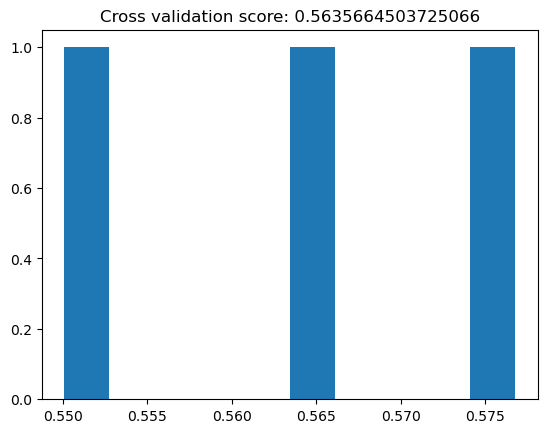

In [84]:
dt_classifier_4 = DecisionTreeClassifier()
dt4 = dt_classifier_4.fit(inputs_train_4, target_train_4)
cross(dt4)

#### K-NN

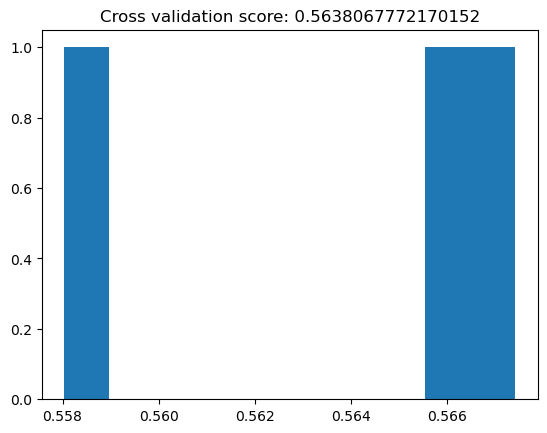

In [85]:
knn_classifier_4 = KNeighborsClassifier()
knn4 = knn_classifier_4.fit(inputs_train_4, target_train_4.values.ravel())
cross(knn4)

Desta vez, o K-NN e a decision tree tem um comportamento muito semelhante.

### Importância das Variáveis <a name = "importância_variáveis_4"></a>
[[voltar a Teste 4]](#teste_4)

In [86]:
def importance(classifier):
    feature_importance=pd.DataFrame({'feature':inputs_train_4.columns,
                             'importance':np.round(classifier.feature_importances_, 3)})
    feature_importance.sort_values('importance',ascending=False, inplace =True)
    feature_importance_4 = feature_importance[feature_importance.importance > 0]
    return feature_importance_4

In [87]:
importance(dt_classifier_4)

,feature,importance
3,companies,0.218
5,n_user_reviews,0.204
2,genres,0.171
4,platforms,0.143
0,year,0.138
1,follows,0.126


                                            ----- ----- ----- ----- -----

## Teste 5 <a name = "teste_5"></a>
   - [Configuração dos Dados](#configurar_dados_5)
   - [Divisão dos Dados](#divisão_dados_5)
   - [Decision Tree](#decision_tree_5)
   - [K-NN](#k-nn_5)
   - [Cross-Validation](#cross_validation_5)
   - [Importância das Variáveis](#importância_variáveis_5)
    
[[voltar a classificação]](#classificação)

Vamos agora apenas testar os dados do tipo 'Numerical'. Deste modo, podemos confirmar se o facto de passarmos dados do tipo 'string' para 'numérico' influência de algum modo negativo os resultados.

(Removemos os seguintes parâmetros: 'id', 'name','category', 'in_franchise', 'genre', 'platform', 'companies')

### Configuração dos Dados <a name = "configurar_dados_5"></a>
[[voltar a Teste 5]](#teste_5)

In [88]:
df_clean = pd.read_csv('video_games_clean.csv')

In [89]:
label_0 = df_clean['id']
label_1 = df_clean['n_dlcs']
label_2 = df_clean['n_expansions']
label_3 = df_clean['year']
label_4 = df_clean['follows']
label_5 = df_clean['n_user_reviews']

inputs_5 = pd.DataFrame(list(zip(label_0, label_1, label_2, label_3, label_4, label_5)),
                        columns=['id', 'n_dlcs', 'n_expansion', 'year', 'follows', 'n_user_reviews'])

In [90]:
inputs_5

,id,n_dlcs,n_expansion,year,follows,n_user_reviews
0,1020,0,0,2013,1766,3369
1,1942,4,2,2015,1516,2997
2,472,3,0,2011,1046,2567
3,72,3,0,2011,963,2544
4,71,0,0,2007,894,2297
...,...,...,...,...,...,...
5756,721,0,0,2005,5,11
5757,682,0,0,2001,11,11
5758,628,0,0,2003,1,11
5759,317,0,0,2006,8,11


### Divisão dos Dados <a name = "divisão_dados_5"></a>
[[voltar a Teste 5]](#teste_5)

- **inputs_train_5** = onde se vão buscar os dados
- **inputs_test_5** = dados escolhidos de modo random para serem testados 
- **target_train_5** = resultados obtidos a partir do 'treino'
- **target_test_5** = dados utilizados para validar os resultados do 'treino'
- **inputs_5** = conjunto de entrada que contém os atributos utilizados para treinar e testar o modelo.
- **targert_c** = conjunto de dados que contém as avaliações dos jogos que pretendenmos prever.

In [91]:
from sklearn.model_selection import train_test_split

(inputs_train_5,
 inputs_test_5,
 target_train_5,
 target_test_5) = train_test_split(inputs_5, target_c, test_size = 0.15, random_state = 1)

In [92]:
inputs_train_5

,id,n_dlcs,n_expansion,year,follows,n_user_reviews
1814,2241,0,0,2013,24,52
2534,5327,0,1,2016,24,34
4549,10958,0,0,2011,6,15
871,28414,1,0,2017,46,123
4528,15756,0,0,2005,7,15
...,...,...,...,...,...,...
905,2343,0,0,2001,30,118
5192,45279,0,0,2011,2,12
3980,15389,0,0,2016,17,18
235,133,0,0,2003,188,400


In [93]:
inputs_test_5

,id,n_dlcs,n_expansion,year,follows,n_user_reviews
2320,1777,0,0,2004,8,38
4090,101461,0,0,2019,9,17
2423,2617,0,0,1997,22,36
354,7327,0,0,2014,116,293
1023,1381,1,0,2011,37,104
...,...,...,...,...,...,...
3861,9691,0,0,2000,8,19
4219,3202,1,0,2014,4,17
4353,8644,0,0,2015,5,16
4642,1467,0,0,2000,4,15


In [94]:
target_train_5

,user_rating
1814,great
2534,good
4549,good
871,great
4528,good
...,...
905,great
5192,great
3980,good
235,great


In [95]:
target_test_5

,user_rating
2320,great
4090,great
2423,great
354,great
1023,good
...,...
3861,great
4219,good
4353,good
4642,great


### Decision Tree <a name = "decision_tree_5"></a>
[[voltar a Teste 5]](#teste_5)

In [96]:
from sklearn.tree import DecisionTreeClassifier

tempo_i = time.time()

dt_classifier_5 = DecisionTreeClassifier()
dt_classifier_5.fit(inputs_test_5, target_test_5)
dt_score_5 = dt_classifier_5.score(inputs_train_5, target_train_5)

tempo_f = time.time()
duracao = (tempo_f - tempo_i)

print("Score desicion tree:", dt_score_5)
print("Tempo que demorou: {:.3f} segundos \n".format(duracao))

Score desicion tree: 0.5578022875816994
Tempo que demorou: 0.011 segundos 



Tempo que demorou: 1.039 segundos 



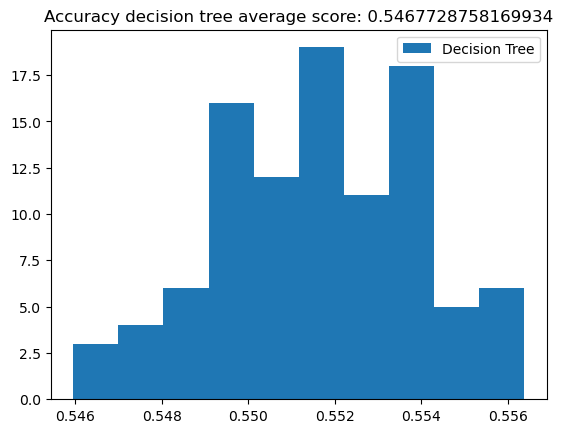

In [97]:
model_accuracies_dt_5 = []

tempo_i = time.time()

for repetition in range(100):
    inputs_train_5, inputs_test_5, target_train_5, target_test_5 = train_test_split(inputs_5,target_c,test_size=0.15,random_state=42)
    
    dt_classifier_5 = DecisionTreeClassifier()
    dt_classifier_5.fit(inputs_test_5, target_test_5)
    dt_classifier_accuracy_5 = dt_classifier_5.score(inputs_train_5, target_train_5)
    model_accuracies_dt_5.append(dt_classifier_accuracy_5)
    
tempo_f = time.time()
duracao = (tempo_f - tempo_i)
print("Tempo que demorou: {:.3f} segundos \n".format(duracao))
    
plt.hist(model_accuracies_dt_5, label ='Decision Tree')
plt.title('Accuracy decision tree average score: {}'.format(np.average(dt_classifier_accuracy_5)));
plt.legend()
plt.show()

### K-NN <a name = "k-nn_5"></a>
[[voltar a Teste 5]](#teste_5)

In [98]:
from sklearn.neighbors import KNeighborsClassifier

tempo_i = time.time()

knn_classifier_5 = KNeighborsClassifier()
knn_classifier_5.fit(inputs_train_5, target_train_5.values.ravel()) #By using values.ravel(), you ensure that the target variable is converted to a 1-dimensional array. 
knn_score_5 = knn_classifier_5.score(inputs_test_5, target_test_5.values.ravel()) 

tempo_f = time.time()
duracao = (tempo_f - tempo_i)

print("Score knn:", knn_score_5)
print("Tempo que demorou: {:.3f} segundos \n".format(duracao))

Score knn: 0.5872832369942197
Tempo que demorou: 0.035 segundos 



Tempo que demorou: 3.455 segundos 



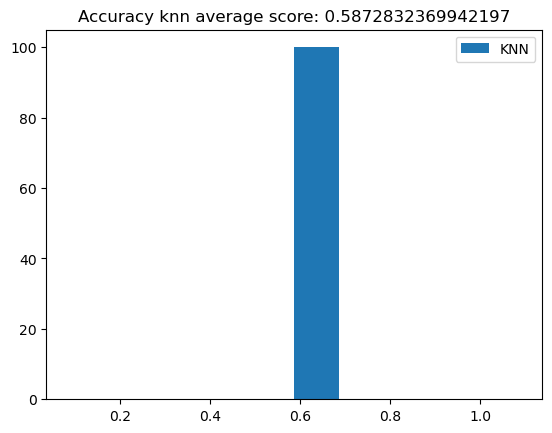

In [99]:
model_accuracies_knn_5 = []

tempo_i = time.time()

for repetition in range(100):
    inputs_train_5, inputs_test_5, target_train_5, target_test_5 = train_test_split(inputs_5,target_c,test_size=0.15,random_state=42)
    
    knn_classifier_5 = KNeighborsClassifier()
    knn_classifier_5.fit(inputs_train_5, target_train_5.values.ravel())
    knn_classifier_accuracy_5 = knn_classifier_5.score(inputs_test_5, target_test_5.values.ravel()) 
    model_accuracies_knn_5.append(knn_classifier_accuracy_5)
    
tempo_f = time.time()
duracao = (tempo_f - tempo_i)
print("Tempo que demorou: {:.3f} segundos \n".format(duracao))
    
plt.hist(model_accuracies_knn_5, label='KNN')
plt.title('Accuracy knn average score: {}'.format(np.average(knn_classifier_accuracy_5)));
plt.legend()
plt.show()

### Cross-Validation <a name = "cross_validation_5"></a>
[[voltar a Teste 5]](#teste_5)

In [100]:
def cross(classifier):
    X_train, X_test, y_train, y_test = train_test_split(inputs_train_5, target_train_5, test_size=0.15)
    classifier.fit(X_train, np.array(y_train).ravel())
    cv_scores = cross_val_score(classifier, X_train, np.array(y_train).ravel(), cv=3)
    plt.hist(cv_scores)
    plt.title('Cross validation score: {}'.format(np.mean(cv_scores)))

#### Decision Tree

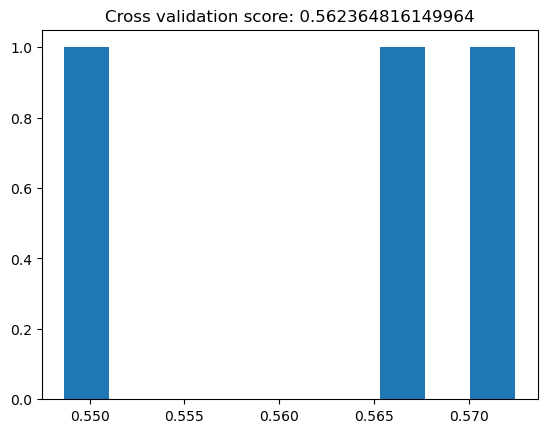

In [101]:
dt_classifier_5 = DecisionTreeClassifier()
dt5 = dt_classifier_5.fit(inputs_train_5, target_train_5)
cross(dt5)

#### K-NN

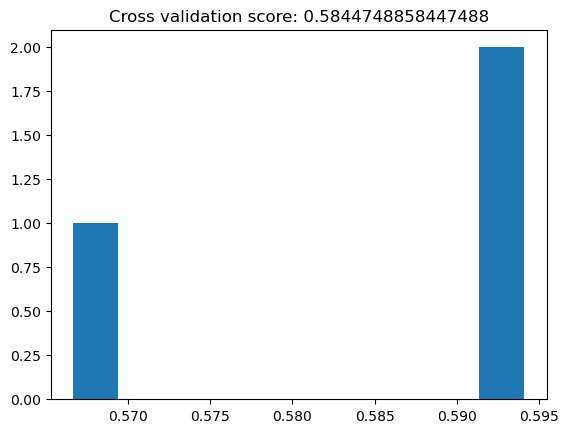

In [102]:
knn_classifier_5 = KNeighborsClassifier()
knn5 = knn_classifier_5.fit(inputs_train_5, target_train_5.values.ravel())
cross(knn5)

Novamente, o K-NN e a decision tree são semelhantes.

### Importância das Variáveis <a name = "importância_variáveis_5"></a>
[[voltar a Teste 5]](#teste_5)

In [103]:
def importance(classifier):
    feature_importance=pd.DataFrame({'feature':inputs_train_5.columns,
                             'importance':np.round(classifier.feature_importances_, 3)})
    feature_importance.sort_values('importance',ascending=False, inplace =True)
    feature_importance_5 = feature_importance[feature_importance.importance > 0]
    return feature_importance_5

In [104]:
importance(dt_classifier_5)

,feature,importance
0,id,0.371
5,n_user_reviews,0.269
4,follows,0.176
3,year,0.149
1,n_dlcs,0.024
2,n_expansion,0.010


    -----------------------------------------------------------------------------------------------------------------------

## Comparar Resultados <a name = "comparar_resultados"></a>
[[voltar ao índice]](#indice)

### Comparação dos diversos gráficos de 'Decision Trees'

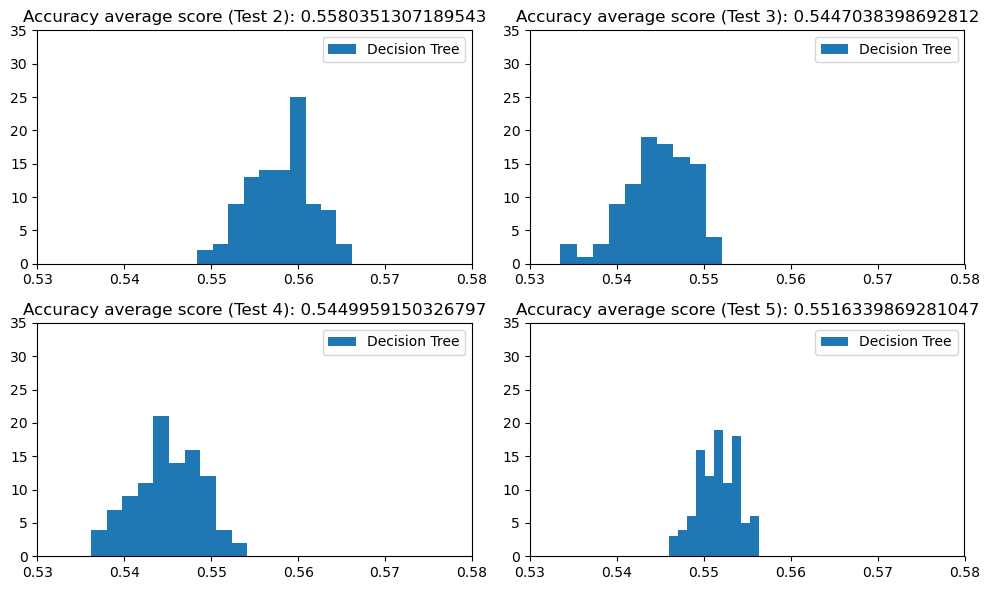

In [105]:
import matplotlib.pyplot as plt
import numpy as np

model_accuracies_dt = [model_accuracies_dt_2, model_accuracies_dt_3, model_accuracies_dt_4, model_accuracies_dt_5]
fig, axs = plt.subplots(2, 2, figsize=(10, 6))  # Ajustar o tamanho da figura

# Plotar cada um dos gráficos em um subplot diferente
for i, model_accuracy in enumerate(model_accuracies_dt):
    axs[i // 2, i % 2].set_xlim([0.53, 0.58])  # Definir limites do eixo x
    axs[i // 2, i % 2].set_ylim([0, 35])
    axs[i // 2, i % 2].hist(model_accuracy, label='Decision Tree')
    axs[i // 2, i % 2].set_title('Accuracy average score (Test {}): {}'.format(i+2, np.average(model_accuracy)))
    axs[i // 2, i % 2].legend()

plt.tight_layout()
plt.show()

### Comparação dos diversos gráficos de 'KNN'

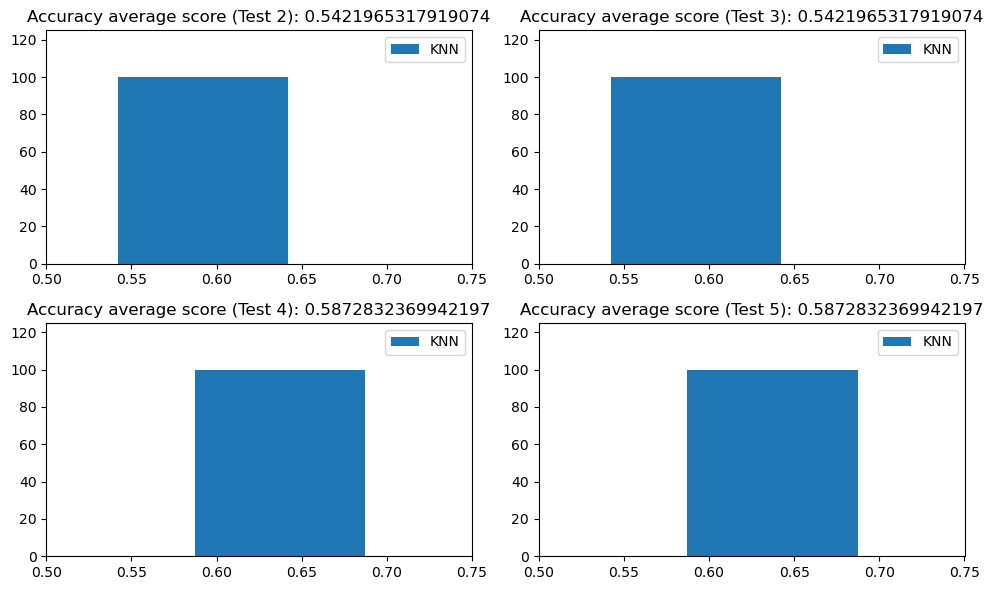

In [106]:
import matplotlib.pyplot as plt
import numpy as np

model_accuracies_knn = [model_accuracies_knn_2, model_accuracies_knn_3, model_accuracies_knn_4, model_accuracies_knn_5]
fig, axs = plt.subplots(2, 2, figsize=(10, 6))  # Ajustar o tamanho da figura

# Plotar cada um dos gráficos em um subplot diferente
for i, model_accuracy in enumerate(model_accuracies_knn):
    axs[i // 2, i % 2].set_xlim([0.5, 0.75])  # Definir limites do eixo x
    axs[i // 2, i % 2].set_ylim([0, 125])
    axs[i // 2, i % 2].hist(model_accuracy, label='KNN')
    axs[i // 2, i % 2].set_title('Accuracy average score (Test {}): {}'.format(i+2, np.average(model_accuracy)))
    axs[i // 2, i % 2].legend()

plt.tight_layout()
plt.show()

    -----------------------------------------------------------------------------------------------------------------------

## Parameter Tuning <a name = "parameter_tuning"></a>

   - [Decision Tree](#decision_tree_pt)
   - [K-NN](#knn_pt)

[[voltar ao índice]](#indice)

Agora que temos a melhor precisão até o momento, vamos ajustar os parâmetros para alcançar uma precisão ainda melhor.

### Decision Tree <a name = "decision_tree_pt"></a>
Utilizaremos o segundo teste, pois tem a melhor precisão na decision tree.

[[voltar a Parameter Tunning]](#parameter_tuning)

**Grid Search:**

In [107]:
parameters_dt = {
    'max_depth': [None, 3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy']
}

In [108]:
classifier_dt = DecisionTreeClassifier()
grid_search_dt = GridSearchCV(classifier_dt, parameters_dt, cv=5)
grid_search_dt.fit(inputs_2, np.array(target_c).ravel())
best_params_dt = grid_search_dt.best_params_
best_model_dt = grid_search_dt.best_estimator_
test_score_dt = best_model_dt.score(inputs_test_2, np.array(target_test_2).ravel())
cv_results_dt = grid_search_dt.cv_results_
mean_scores_dt = cv_results_dt['mean_test_score']
std_scores_dt = cv_results_dt['std_test_score']

In [109]:
print("Decision Tree - Best Hyperparameters:", best_params_dt)
print("Decision Tree - Test Score:", test_score_dt)

Decision Tree - Best Hyperparameters: {'criterion': 'entropy', 'max_depth': 3, 'min_samples_split': 2}
Decision Tree - Test Score: 0.6427745664739885


Agora vamos visualizar o grid search para ver como os parâmetros interagem.

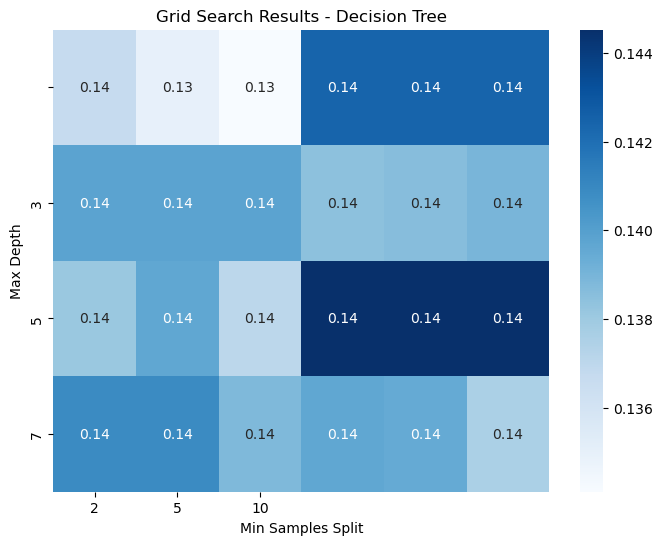

In [110]:
import matplotlib.pyplot as plt
import seaborn as sns

grid_visualization_dt = grid_search_dt.cv_results_['mean_test_score']
param_grid_shape_dt = [len(v) for v in grid_search_dt.param_grid.values()]
grid_visualization_dt = grid_visualization_dt.reshape(param_grid_shape_dt[0], -1)

plt.figure(figsize=(8, 6))
sns.heatmap(grid_visualization_dt, cmap='Blues', annot=True)
plt.xticks(np.arange(param_grid_shape_dt[1]) + 0.5, grid_search_dt.param_grid['min_samples_split'])
plt.yticks(np.arange(param_grid_shape_dt[0]) + 0.5, grid_search_dt.param_grid['max_depth'])
plt.xlabel('Min Samples Split')
plt.ylabel('Max Depth')
plt.title('Grid Search Results - Decision Tree')
plt.show()


### K-NN <a name = "knn_pt"></a>
Vamos utilizar o quinto teste para o K-NN.

[[voltar a Parameter Tunning]](#parameter_tuning)

**Grid Search:**

In [111]:
parameters_knn = {
    'n_neighbors': [3, 5, 7],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
}

In [112]:
classifier_knn = KNeighborsClassifier()
grid_search_knn = GridSearchCV(classifier_knn, parameters_knn, cv=5)
grid_search_knn.fit(inputs_5, np.array(target_c).ravel())
best_params_knn = grid_search_knn.best_params_
best_model_knn = grid_search_knn.best_estimator_
test_score_knn = best_model_knn.score(inputs_test_5, np.array(target_test_5).ravel())
cv_results_knn = grid_search_knn.cv_results_
mean_scores_knn = cv_results_knn['mean_test_score']
std_scores_knn = cv_results_knn['std_test_score']

In [113]:
print("K-Nearest Neighbors - Best Hyperparameters:", best_params_knn)
print("K-Nearest Neighbors - Test Score:", test_score_knn)

K-Nearest Neighbors - Best Hyperparameters: {'algorithm': 'brute', 'n_neighbors': 7, 'weights': 'uniform'}
K-Nearest Neighbors - Test Score: 0.6890173410404624


Agora vamos visualizar o grid search para ver como os parâmetros interagem.

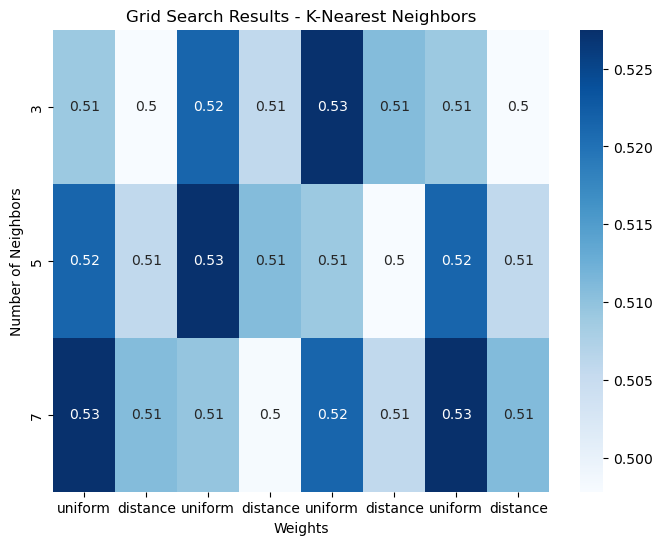

In [114]:
import matplotlib.pyplot as plt
import seaborn as sns

grid_visualization_knn = grid_search_knn.cv_results_['mean_test_score']
param_grid_shape_knn = [len(v) for v in grid_search_knn.param_grid.values()]
grid_visualization_knn = grid_visualization_knn.reshape(param_grid_shape_knn[0], -1)

plt.figure(figsize=(8, 6))
sns.heatmap(grid_visualization_knn, cmap='Blues', annot=True)
plt.xticks(np.arange(param_grid_shape_knn[1] * param_grid_shape_knn[2]) + 0.5, grid_search_knn.param_grid['weights'] * param_grid_shape_knn[2])
plt.yticks(np.arange(param_grid_shape_knn[0]) + 0.5, grid_search_knn.param_grid['n_neighbors'])
plt.xlabel('Weights')
plt.ylabel('Number of Neighbors')
plt.title('Grid Search Results - K-Nearest Neighbors')
plt.show()


    -----------------------------------------------------------------------------------------------------------------------

## Conclusão <a name = "conclusão"></a>
[[voltar ao índice]](#indice)

No processo de classificação realizado neste estudo, foram conduzidos cinco testes abrangendo diferentes aspectos, desde a configuração dos dados até à aplicação de algoritmos de machine learning, como a árvore de decisão e o KNN, além da análise da importância das variáveis. Ao longo dos testes, observou-se que não houve grandes discrepâncias nos valores da pontuação média de precisão da árvore de decisão, que se manteve em torno de 0,55. Quanto ao KNN, o teste número cinco apresentou o valor mais alto de precisão média, atingindo 0,58, após a remoção de certos parâmetros, como 'id', 'name', 'category', 'in_franchise', 'genre', 'platform' e 'companies'.

Durante a cross-validation, optou-se por excluir o primeiro teste devido à tendenciosidade dos dados ao incluir o atributo 'user_score', que possui informações semelhantes ao atributo 'user_rating', porém em um formato diferente. Portanto, incluí-los simultaneamente iria criar uma correlação direta, deixando de ser necessário o tratamento de qualquer dados, uma vez que os testes seriam avaliados corretamente com uma taxa de sucesso de 99%. Deste modo, esse teste foi apenas realizado com o intuito de comprovar este facto. Na árvore de decisão, utilizando o segundo teste, que obteve a melhor precisão na cross-validation, empregou-se a técnica grid search, alcançando um score de 0,642. Quanto ao KNN, o quinto teste foi selecionado, obtendo-se um score de 0,689.

Estas conclusões destacam a importância de realizar uma análise cuidadosa dos dados, incluindo a exclusão de atributos redundantes, além de ressaltar a necessidade de ajuste de parâmetros para obter um desempenho otimizado dos modelos de classificação utilizados.

    -----------------------------------------------------------------------------------------------------------------------
    -----------------------------------------------------------------------------------------------------------------------